# **Import Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style="whitegrid")

# **Unggah Dataset**

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portofolio Data/Segmentasi Pelanggan/online_retail.csv")

# **EDA & Data Cleaning**

In [6]:
print("Data Teratas")
print(df.head())
print("\n")

print("Info Data")
print(df.info())
print("\n")

print("Statistik Deskriptif")
print(df.describe())

Data Teratas
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Info Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  

## **Menangani Missing Values**

In [15]:
print('Jumlah nilai hilang sebelum dibersihkan: ')
print(df.isnull().sum())

# Menghapus baris yang tidak memiliki CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

print('\nJumlah nilai hilang setelah dibersihkan: ')
print(df.isnull().sum())

# Cek dimensi data setelah penghapusan
print('\nDimensi data setelah penghapusan: ')
print(df.shape)


Jumlah nilai hilang sebelum dibersihkan: 
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Jumlah nilai hilang setelah dibersihkan: 
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Dimensi data setelah penghapusan: 
(401604, 8)


# **Menghapus Data Duplikat**

In [19]:
print("Jumlah baris duplikat: ")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\nJumlah baris duplikat setelah dibersihkan: ")
print(df.duplicated().sum())

print("Dimensi data setelah menghapus duplikat:", df.shape)

Jumlah baris duplikat: 
0

Jumlah baris duplikat setelah dibersihkan: 
0
Dimensi data setelah menghapus duplikat: (401604, 8)


# **Memperbaiki Tipe Data**

In [22]:
# Mengubah CustomerID dari float ke integer, lalu ke string
# Kita ubah ke integer dulu untuk menghilangkan desimal, lalu string karena ini adalah ID
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

# Mengubah InvoiceDate dari object ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print('\nTipe data setelah diperbaiki:')
df.info()


Tipe data setelah diperbaiki:
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


# **Menangani Data yang Tidak Valid**

In [23]:
# Menganalisis transaksi pembelian (kuantitas > 0)
df = df[df['Quantity'] > 0]

# Menganalisis barang yang memiliki harga (harga > 0)
df = df[df['UnitPrice'] > 0]

print("Dimensi data setelah menghapus retur dan harga nol:", df.shape)

Dimensi data setelah menghapus retur dan harga nol: (392692, 8)


# **Membuat Kolom TotalPrice**

In [24]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print('\nKolom TotalPrice ditambahkan:')
df.head()


Kolom TotalPrice ditambahkan:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# **Cek Statistik Deskriptif**

In [27]:
print("\nStatistik Deskriptif Data Bersih:")
print(df.describe())


Statistik Deskriptif Data Bersih:
            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          TotalPrice  
count  392692.000000  
mean       22.631500  
min         0.001000  
25%         4.950000  
50%        12.450000  
75%        19.800000  
max    168469.600000  
std       311.099224  


# **Menghitung Metrik RFM**
***1. Menentukan Tanggal Referensi (Snapshot Date)***

In [28]:
# Menemukan tanggal transaksi terakhir dalam dataset
last_order_date = df['InvoiceDate'].max()
print(f"Tanggal Transaksi Terakhir: {last_order_date}")

# Menetapkan tanggal referensi (snapshot) satu hari setelahnya
snapshot_date = last_order_date + dt.timedelta(days=1)
print(f"Tanggal Referensi: {snapshot_date}")

Tanggal Transaksi Terakhir: 2011-12-09 12:50:00
Tanggal Referensi: 2011-12-10 12:50:00


***2. Menghitung Nilai Recency, Frequency, dan Monetary untuk Setiap Pelanggan***

In [29]:
# Mengelompokkan data berdasarkan CustomerID dan menghitung RFM
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,  # Recency
    'InvoiceNo': 'count',                                           # Frequency
    'TotalPrice': 'sum'                                             # Monetary
})

# Mengubah nama kolom
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Tampilkan 5 baris pertama dari dataframe RFM
print('DataFrame RFM yang berhasil dibuat: ')
print(rfm_df.head())

DataFrame RFM yang berhasil dibuat: 
            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2        182   4310.00
12348            75         31   1797.24
12349            19         73   1757.55
12350           310         17    334.40


**3. Memeriksa Statistik Deskriptif dari RFM**

In [30]:
# Menampilkan statistik deskriptif dari RFM
print("\nStatistik Deskriptif dari RFM:")
print(rfm_df.describe())


Statistik Deskriptif dari RFM:
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422    90.523744    2048.688081
std     100.014169   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.000000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


# **Pra-Pemrosesan Data untuk Clustering**
***1. Transformasi Logaritmik (Log Transform)***

In [31]:
# Membuat salinan dataframe RFM agar data asli tetap aman
rfm_log = rfm_df.copy()

# Menerapkan transformasi logaritmik
rfm_log['Recency'] = np.log(rfm_log['Recency'])
rfm_log['Frequency'] = np.log(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log(rfm_log['Monetary'])

print('Data RFM setelah transformasi logaritmik:')
print(rfm_log.head())

Data RFM setelah transformasi logaritmik:
             Recency  Frequency   Monetary
CustomerID                                
12346       5.786897   0.000000  11.253942
12347       0.693147   5.204007   8.368693
12348       4.317488   3.433987   7.494007
12349       2.944439   4.290459   7.471676
12350       5.736572   2.833213   5.812338


***visualisasi Distribusi***

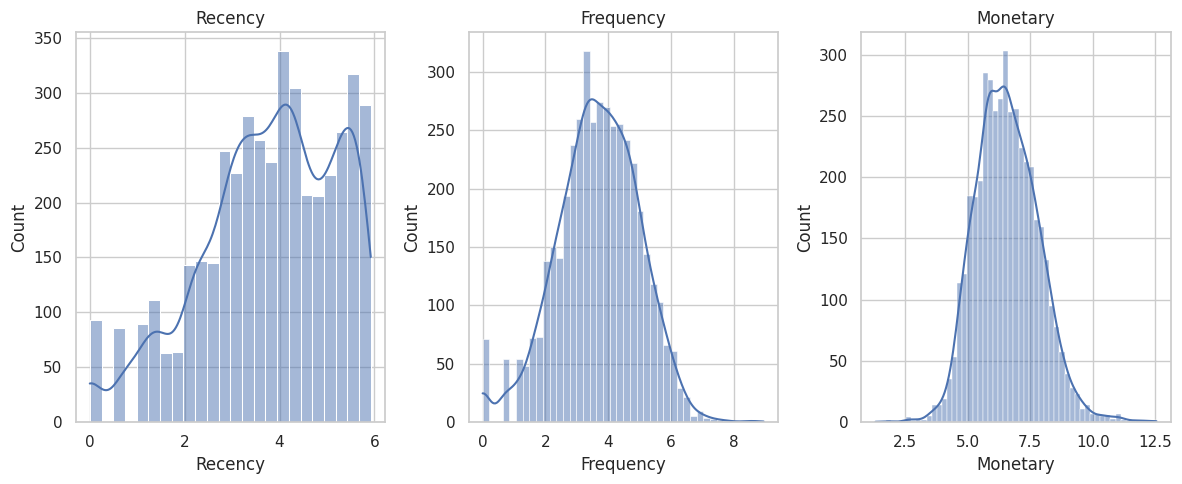

In [32]:
# Visualisasi distribusi data setelah log transform
plt.figure(figsize=(12, 5))

# Plot untuk Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_log['Recency'], kde=True)
plt.title('Recency')

# Plot untuk Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_log['Frequency'], kde=True)
plt.title('Frequency')

# Plot untuk Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_log['Monetary'], kde=True)
plt.title('Monetary')

plt.tight_layout()
plt.show()

***2. Standardisasi Data (Scaling)***

In [33]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada data
rfm_scaled = scaler.fit_transform(rfm_log)

# Mengubah hasil scaling (yang berupa numpy array) kembali menjadi DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm_log.index, columns=rfm_log.columns)

print('Data RFM setelah standardisasi:')
print(rfm_scaled.head())

Data RFM setelah standardisasi:
             Recency  Frequency  Monetary
CustomerID                               
12346       1.409894  -2.779978  3.700201
12347      -2.146498   1.160356  1.413256
12348       0.383971  -0.179855  0.719951
12349      -0.574674   0.468643  0.702251
12350       1.374758  -0.634745 -0.612996


# **Clustering dengan K-Means**

***1. Menentukan Jumlah Cluster Optimal (Elbow Method)***

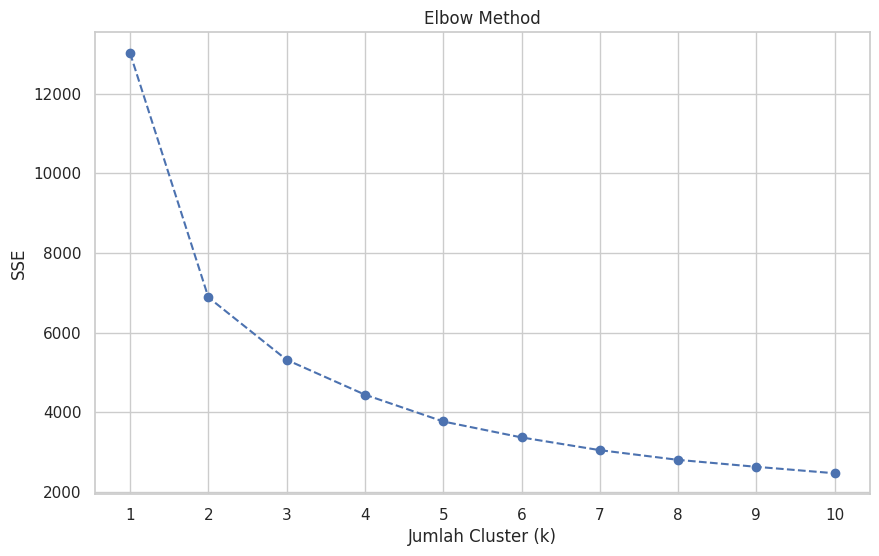

In [34]:
from sklearn.cluster import KMeans

# Membuat list kosong untuk menyimpan nilai SSE (Sum of Squared Errors)
sse = []

# Mencoba jumlah cluster dari 1-10
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(rfm_scaled)
  sse.append(kmeans.inertia_) # inertia adalah nilai SSE

# Membuat plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')
plt.xticks(k_range)
plt.grid(True)
plt.show()

***2. Menjalankan Model Final K-Means***

In [35]:
# Ganti nilai 'n_clusters' dengan angka yang Anda pilih dari Elbow Method
optimal_k = 4 # saya pilih 4

# Membuat dan melatih model K-Means final
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(rfm_scaled)

# Menambah kolom 'Clusters' ke DataFrame RFM asli kita
rfm_df['Clusters'] = kmeans_final.labels_

# Tampilkan hasil clustering untuk beberapa pelanggan
print(f"Hasil Segmentasi Pelanggan ke dalam {optimal_k} Cluster:")
print(rfm_df.head())

Hasil Segmentasi Pelanggan ke dalam 4 Cluster:
            Recency  Frequency  Monetary  Clusters
CustomerID                                        
12346           326          1  77183.60         2
12347             2        182   4310.00         0
12348            75         31   1797.24         2
12349            19         73   1757.55         2
12350           310         17    334.40         1


# **Interpretasi dan Rekomendasi Bisnis**

***1. Menganalisis Karakteristik Setiap Cluster***

In [37]:
# Menganalisis nilai rata-rata RFM dan jumlah pelanggan untuk setiap cluster
cluster_summary = rfm_df.groupby('Clusters').agg({
    'Recency'   : 'mean',
    'Frequency' : 'mean',
    'Monetary'  : 'mean',
    'Clusters' : 'count'
}).rename(columns={'Clusters' : 'Jumlah Pelanggan'})

print('Karakteristik Setiap Clusters:')
print(cluster_summary.sort_values(by='Monetary', ascending=False)) # Diurutkan berdasarkan Monetary



Karakteristik Setiap Clusters:
             Recency   Frequency     Monetary  Jumlah Pelanggan
Clusters                                                       
0          12.169654  283.046595  7200.324719               837
2          93.628483   80.061920  1517.803423              1292
3          19.627098   38.474820   589.850779               834
1         184.654545   14.730182   296.436023              1375


***2. Visualisasi Hasil Segmentasi***

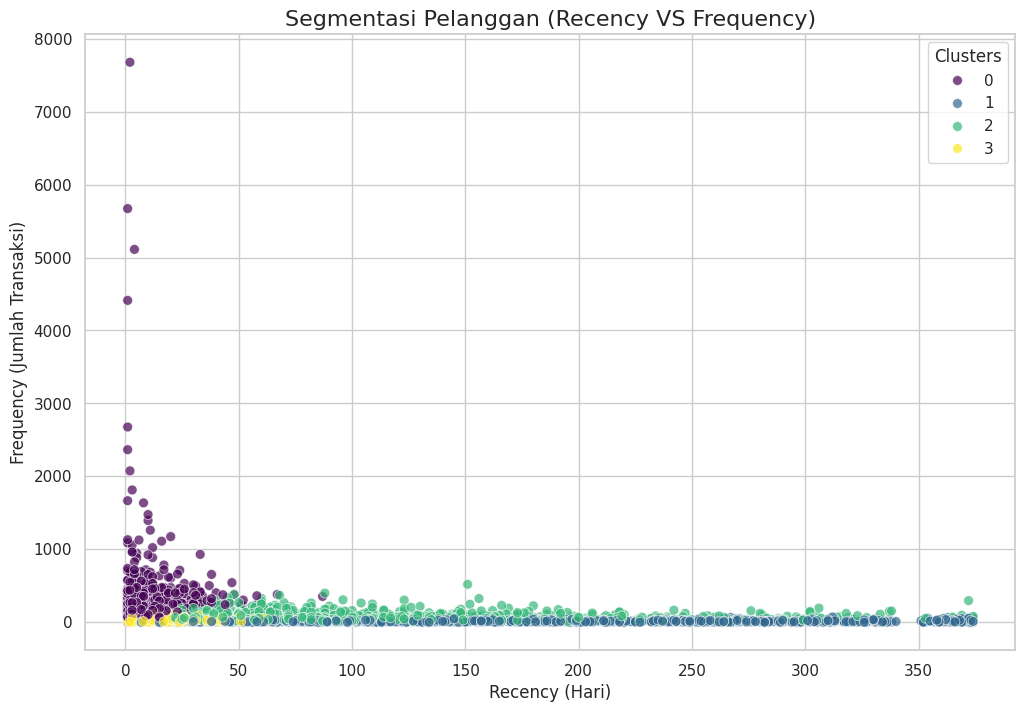

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Clusters', palette='viridis', s=50, alpha=0.7)
plt.title('Segmentasi Pelanggan (Recency VS Frequency)', fontsize=16)
plt.xlabel('Recency (Hari)', fontsize=12)
plt.ylabel('Frequency (Jumlah Transaksi)', fontsize=12)
plt.legend(title="Clusters")
plt.show()

# **Mengimplementasikan Gradio**

***1. Instal Gradio***

In [39]:
!pip install gradio -q

***2.  Logika Prediksi dalam Satu Fungsi***

In [40]:
import gradio as gr
import pandas as pd
import numpy as np

# Buat dictionary untuk memetakan nomor cluster ke nama dan rekomendasi
cluster_map = {
    0: {
        "nama": "Champions / Pelanggan Terbaik",
        "rekomendasi": "Pertahankan dengan program loyalitas eksklusif dan akses VIP. Jangan beri diskon umum."
    },

    1: {
        "nama": "At-Risk / Pelanggan Berisiko",
        "rekomendasi": "Kirim kampanye 'Kami Merindukanmu' dengan diskon personal untuk menarik mereka kembali."
    },

    2: {
        "nama": "Loyal Customers / Pelanggan Setia",
        "rekomendasi": "Tawarkan produk pelengkap (cross-sell) dan berikan bonus poin untuk mendorong jadi Champions."
    },
    3: {
        "nama": "New / Promising / Pelanggan Baru",
        "rekomendasi": "Bina hubungan dengan email selamat datang dan tawarkan diskon untuk pembelian kedua."
    }
}

# fungsi utama yang akan dibungkus oleh Gradio
def predict_segment(recency, frequency, monetary):
  # 1. Buat DataFrame dari input
    input_data = pd.DataFrame([[recency, frequency, monetary]], columns=['Recency', 'Frequency', 'Monetary'])
  # 2. Terapkan transformasi logaritmik
    input_log = np.log1p(input_data)
  # 3. Terapkan scaling menggunakan scaler yang sudah ada (PENTING: gunakan .transform, bukan .fit_transform)
    input_scaled = scaler.transform(input_log)

  # 4. Prediksi cluster menggunakan model yang sudah ada
    predicted_cluster = kmeans_final.predict(input_scaled)[0]

  # 5. Dapatkan nama segmen dan rekomendasi dari dictionary
    segment_name = cluster_map[predicted_cluster]["nama"]
    recommendation = cluster_map[predicted_cluster]["rekomendasi"]

    return segment_name, recommendation

***3. Luncurkan Interface Gradio***

In [68]:
# Membuat Interface Gradio
iface = gr.Interface(
    fn=predict_segment,
    inputs=[
        gr.Number(label="Recency (Jumlah hari sejak pembelian terakhir)"),
        gr.Number(label="Frequency (Total jumlah transaksi)"),
        gr.Number(label="Monetary (Total nilai belanja dalam Rp/$)")
    ],
    outputs=[
        gr.Textbox(label="Segmen Pelanggan"),
        gr.Textbox(label="Rekomendasi Aksi Pemasaran")
    ],
    title="Analisis Segmentasi Pelanggan (RFM)",
    description="Masukkan data Recency, Frequency, dan Monetary seorang pelanggan untuk mengetahui segmen dan rekomendasi aksi yang sesuai.",
    theme='soft',
    allow_flagging="never"
)

# Luncurkan aplikasi!
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05c9686178319a31b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
